<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-task3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Dataset Head ====
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

===== Summary Statistics ====
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

===== Missing Values ====
ag

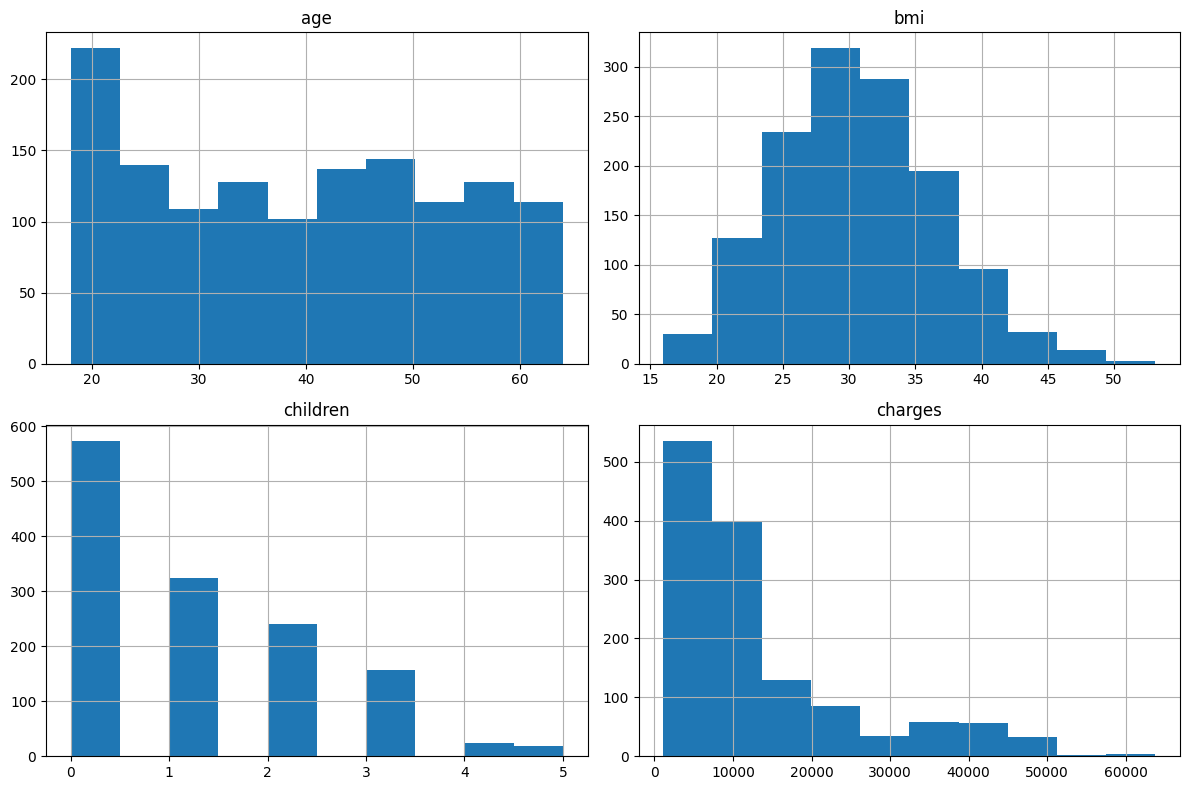


===== Skewness ====
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


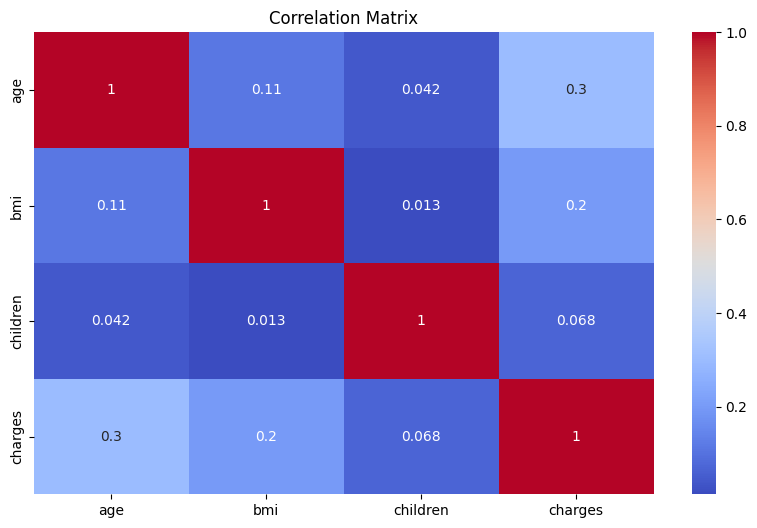


===== SIMPLE LINEAR REGRESSION ====
Coefficient: [392.43654417]
Intercept: 1353.0730722046683
MAE: 9784.65259627133
MSE: 149085057.03839505
R² Score: 0.03970193117941878


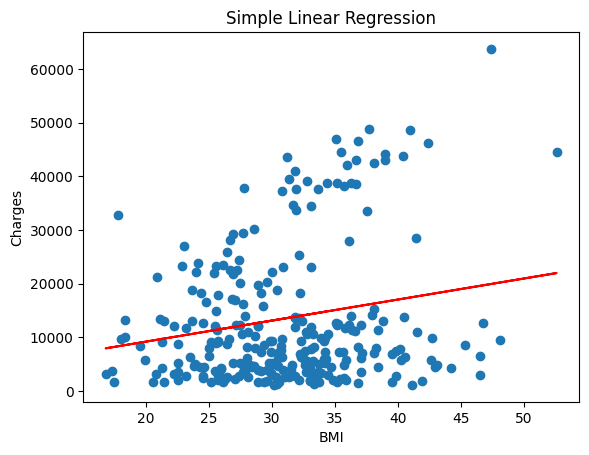


===== MULTIPLE LINEAR REGRESSION ====
Train R²: 0.7417255854683333
Test R²: 0.7835929767120722
MAE: 4181.194473753643
MSE: 33596915.85136148
R² Score: 0.7835929767120722


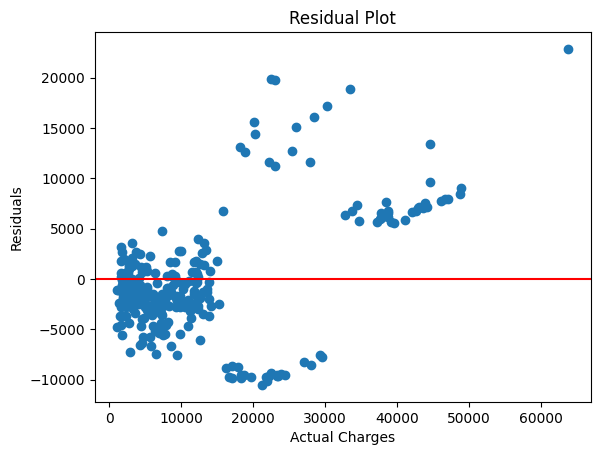


===== Feature Importance ====
                 Feature   Coefficient
1        cat__smoker_yes  23651.128856
7          num__children    425.278784
6               num__bmi    337.092552
5               num__age    256.975706
0          cat__sex_male    -18.591692
2  cat__region_northwest   -370.677326
3  cat__region_southeast   -657.864297
4  cat__region_southwest   -809.799354


In [6]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Task 1: Load dataset using URL
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
print("\n===== Dataset Head ====")
print(df.head())
print("\n===== Summary Statistics ====")
print(df.describe())
print("\n===== Missing Values ====")
print(df.isnull().sum())

# Handle missing values (mean, median, mode)
num_mean_cols = ['age']
num_median_cols = ['bmi', 'children']
cat_mode_cols = ['sex', 'smoker', 'region']

for col in num_mean_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in num_median_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Task 2: Visual EDA using histograms
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Skewness check
print("\n===== Skewness ====")
print(df.skew(numeric_only=True)) # Fix: Only calculate skewness for numeric columns

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm") # Fix: Only calculate correlation for numeric columns
plt.title("Correlation Matrix")
plt.show()

# Task 3: Simple Linear Regression
X_simple = df[['bmi']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)
y_pred_simple = lr_simple.predict(X_test)

print("\n===== SIMPLE LINEAR REGRESSION ====")
print("Coefficient:", lr_simple.coef_)
print("Intercept:", lr_simple.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R² Score:", r2_score(y_test, y_pred_simple))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_simple, color='red')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Simple Linear Regression")
plt.show()

# Task 3: Multiple Linear Regression
X = df.drop("charges", axis=1)
y = df["charges"]

categorical = ['sex', 'smoker', 'region']
numeric = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', 'passthrough', numeric)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\n===== MULTIPLE LINEAR REGRESSION ====")
print("Train R²:", pipeline.score(X_train, y_train))
print("Test R²:", pipeline.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Residual plot
plt.scatter(y_test, y_test - y_pred)
plt.axhline(0, color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Feature importance
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
coeffs = pipeline.named_steps['model'].coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
}).sort_values(by="Coefficient", ascending=False)

print("\n===== Feature Importance ====")
print(importance_df)